<a href="https://colab.research.google.com/github/Raneq1/Saudi-Tourism-Analysis-2018-2023/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_csv("/content/tourism_with_temps.csv")
df.head() # قراءة البيانات

,month,year,destinationProvinceNameEn,originProvinceNameEn,visitPurposeEn,trips,spendSAR,nights,origin_temp,destination_temp
0,1,2018,Albaha,Alqassim,Leisure,1754.46,2631692.38,5263.38,12.08,19.0
1,1,2018,Albaha,Jazan,VFR,1583.60,2375406.99,4750.81,26.09,19.0
2,1,2018,Albaha,Madinah,Leisure,12733.95,20629002.13,72159.06,14.67,19.0
3,1,2018,Albaha,Makkah,Business,6568.35,5327660.65,15326.15,20.71,19.0
4,1,2018,Albaha,Makkah,Leisure,68910.76,44778264.67,390646.05,20.71,19.0


In [5]:
df.columns #نعرض أسماء كل الأعمدة

Index(['month', 'year', 'destinationProvinceNameEn', 'originProvinceNameEn',
       'visitPurposeEn', 'trips', 'spendSAR', 'nights', 'origin_temp',
       'destination_temp'],
      dtype='object')

In [6]:
# عرض معلومات عامة
df.info()

# نتحقق من القيم المفقودة
df.isna().sum()

# نستبدل القيم المفقودة بالمعدل (للأعمدة الرقمية فقط)
num_cols = ['trips', 'spendSAR', 'nights', 'destination_temp']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].mean())

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30850 entries, 0 to 30849
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      30850 non-null  int64  
 1   year                       30850 non-null  int64  
 2   destinationProvinceNameEn  30850 non-null  object 
 3   originProvinceNameEn       30850 non-null  object 
 4   visitPurposeEn             30850 non-null  object 
 5   trips                      30850 non-null  float64
 6   spendSAR                   30850 non-null  float64
 7   nights                     30850 non-null  float64
 8   origin_temp                28263 non-null  float64
 9   destination_temp           28021 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.4+ MB


,month,year,destinationProvinceNameEn,originProvinceNameEn,visitPurposeEn,trips,spendSAR,nights,origin_temp,destination_temp
0,1,2018,Albaha,Alqassim,Leisure,1754.46,2631692.38,5263.38,12.08,19.0
1,1,2018,Albaha,Jazan,VFR,1583.60,2375406.99,4750.81,26.09,19.0
2,1,2018,Albaha,Madinah,Leisure,12733.95,20629002.13,72159.06,14.67,19.0
3,1,2018,Albaha,Makkah,Business,6568.35,5327660.65,15326.15,20.71,19.0
4,1,2018,Albaha,Makkah,Leisure,68910.76,44778264.67,390646.05,20.71,19.0


In [7]:
# نحسب مجموع الرحلات لكل منطقة وجهة
top_destinations = df.groupby('destinationProvinceNameEn')['trips'].sum().sort_values(ascending=False)

# نعرض أول 10 مناطق
top_destinations.head(10)


,trips
destinationProvinceNameEn,
Makkah,1.051812e+08
Riyadh,6.116996e+07
Eastern,4.676064e+07
Madinah,3.599376e+07
Aseer,3.259671e+07
Alqassim,1.694117e+07
Jazan,1.533221e+07
Tabuk,1.244542e+07
Hail,8.758305e+06


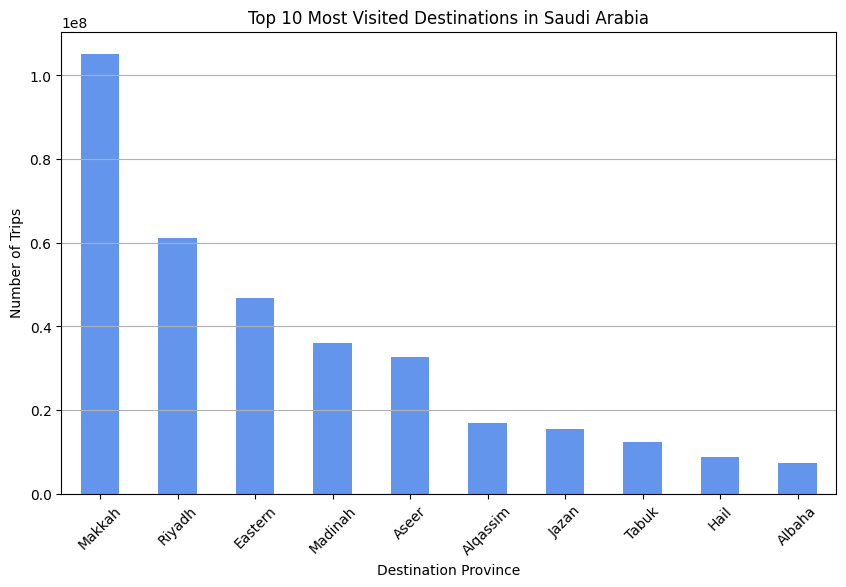

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_destinations.head(10).plot(kind='bar', color='cornflowerblue')
plt.title("Top 10 Most Visited Destinations in Saudi Arabia")
plt.xlabel("Destination Province")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [9]:
visit_purpose = df.groupby('visitPurposeEn')['trips'].sum().sort_values(ascending=False)
visit_purpose

,trips
visitPurposeEn,
Leisure,1.444625e+08
VFR,1.262309e+08
Religious,5.023843e+07
Business,2.266959e+07
Other,1.315680e+07


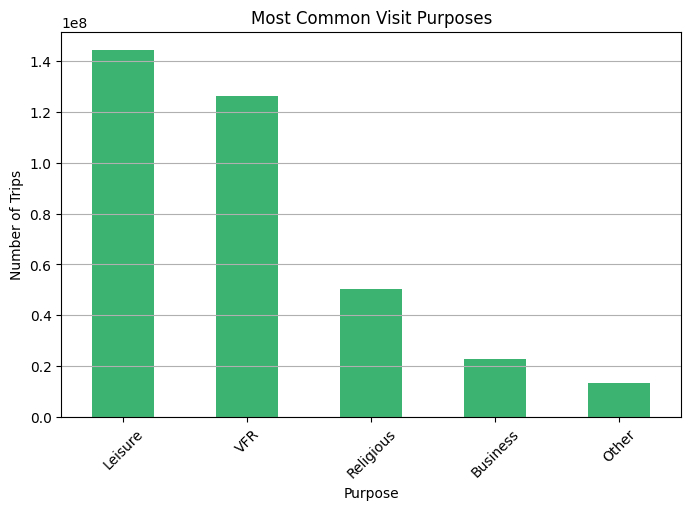

In [10]:
plt.figure(figsize=(8,5))
visit_purpose.plot(kind='bar', color='mediumseagreen')
plt.title("Most Common Visit Purposes")
plt.xlabel("Purpose")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

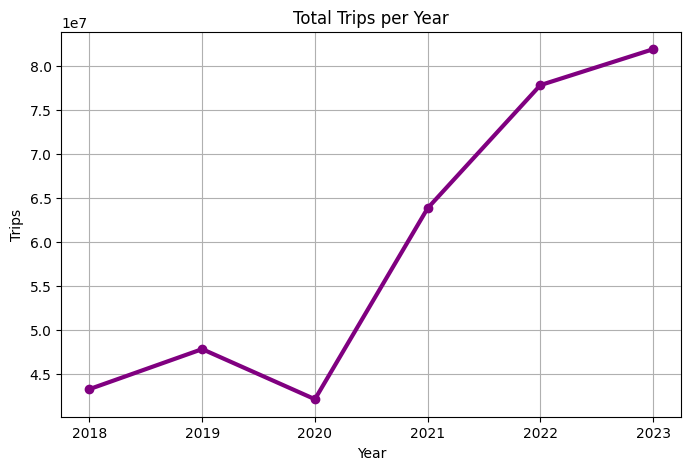

In [11]:
yearly_trips = df.groupby('year')['trips'].sum()

plt.figure(figsize=(8,5))
plt.plot(yearly_trips.index, yearly_trips.values, marker='o', linewidth=3, color='purple')
plt.title("Total Trips per Year")
plt.xlabel("Year")
plt.ylabel("Trips")
plt.grid(True)
plt.show()


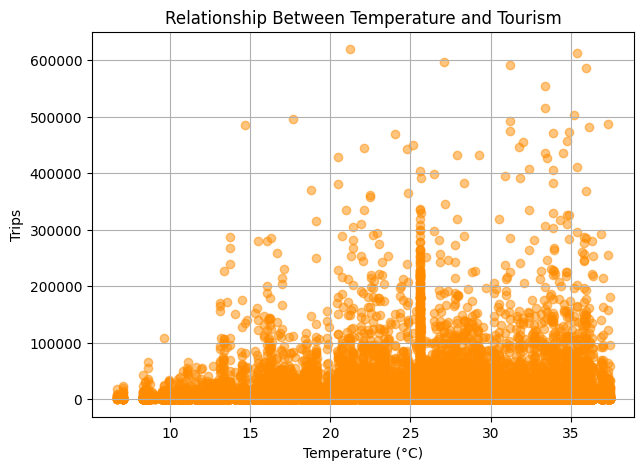

In [12]:
plt.figure(figsize=(7,5))
plt.scatter(df['destination_temp'], df['trips'], alpha=0.5, color='darkorange')
plt.title("Relationship Between Temperature and Tourism")
plt.xlabel("Temperature (°C)")
plt.ylabel("Trips")
plt.grid(True)
plt.show()


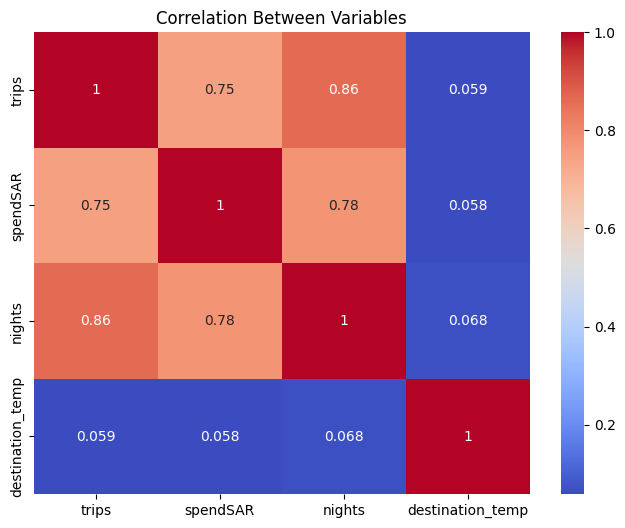

In [13]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df[['trips', 'spendSAR', 'nights', 'destination_temp']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Between Variables")
plt.show()


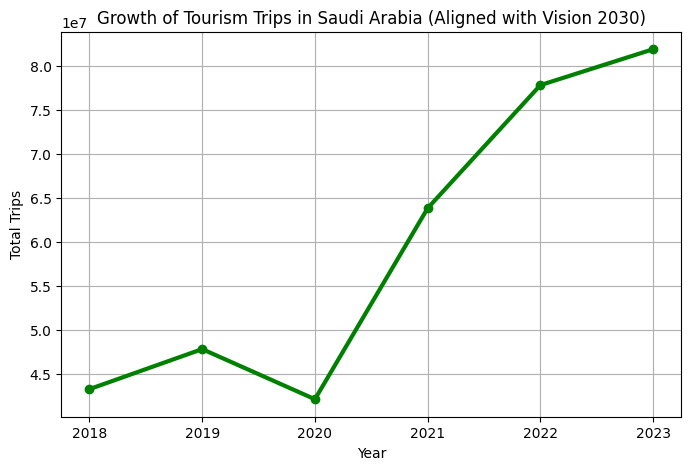

=== Tourism Growth Analysis ===
From 2018 to 2023, total trips increased by 89.39%.

Interpretation related to Vision 2030:
- هذا الارتفاع الكبير في عدد الرحلات يدل على توسّع قطاع السياحة في السعودية.
- وتؤكد البيانات أن هناك نموًا عامًا بعد 2018 بسبب الاستثمار في الترفيه، المواسم، والبنية التحتية.
- الزيادة تتماشى مع أهداف رؤية 2030 لرفع مساهمة السياحة في الاقتصاد واستقطاب عدد أكبر من الزوار.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) حساب إجمالي الرحلات لكل سنة ---
yearly = df.groupby('year')['trips'].sum().reset_index()

# --- 2) حساب نسبة النمو من أول سنة إلى آخر سنة ---
start_year = yearly['year'].min()
end_year = yearly['year'].max()

start_value = yearly[yearly['year'] == start_year]['trips'].values[0]
end_value = yearly[yearly['year'] == end_year]['trips'].values[0]

growth_percent = ((end_value - start_value) / start_value) * 100

# --- 3) رسم الاتجاه العام للسياحة ---
plt.figure(figsize=(8,5))
plt.plot(yearly['year'], yearly['trips'], marker='o', linewidth=3, color='green')
plt.title("Growth of Tourism Trips in Saudi Arabia (Aligned with Vision 2030)")
plt.xlabel("Year")
plt.ylabel("Total Trips")
plt.grid(True)
plt.show()

# --- 4) طباعة تفسير يربط النتائج برؤية 2030 ---
print("=== Tourism Growth Analysis ===")
print(f"From {start_year} to {end_year}, total trips increased by {growth_percent:.2f}%.")

print("\nInterpretation related to Vision 2030:")
print("- هذا الارتفاع الكبير في عدد الرحلات يدل على توسّع قطاع السياحة في السعودية.")
print("- وتؤكد البيانات أن هناك نموًا عامًا بعد 2018 بسبب الاستثمار في الترفيه، المواسم، والبنية التحتية.")
print("- الزيادة تتماشى مع أهداف رؤية 2030 لرفع مساهمة السياحة في الاقتصاد واستقطاب عدد أكبر من الزوار.")


# New Section

In [20]:
# --- تنظيف الأعمدة الرقمية المطلوبة للنموذج ---
num_cols = ['destination_temp', 'nights', 'spendSAR']

for col in num_cols:
    # نحولها لأرقام بالقوة
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # نعوض أي قيمة مفقودة بالمتوسط
    df[col] = df[col].fillna(df[col].mean())


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# --- 1) المتغيرات ---
X = df[['destination_temp', 'nights', 'spendSAR']]
y = df['trips']

# --- 2) تقسيم البيانات ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3) بناء الموديل ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- 4) التنبؤ ---
y_pred = model.predict(X_test)

# --- 5) تقييم الموديل ---
r2 = r2_score(y_test, y_pred)

# نحسب RMSE بالطريقة الصحيحة (بدون squared=False)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("RMSE:", rmse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R² Score: 0.7391012559249358
RMSE: 17042.04072416888
Coefficients: [-1.04044087e+01  1.25912716e-01  1.44665416e-04]
Intercept: 1690.124362907307
